# Statistic for AI and Data Science - Coursework 1
## Yiquan Shao

#### 0.0 In this coursework, we will use pandas and matplotlib.plot to deal with data, so first we should import these libraries.

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### 0.1 We need to use "hourlyExits.csv" to analyse questions, so we use function pd.read_csv to create a dataframe and name it as "exits".

In [101]:
exits = pd.read_csv('hourlyExits.csv',index_col='Station')
exits

,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,...,H16,H17,H18,H19,H20,H21,H22,H23,H00,H01
Station,,,,,,,,,,,,,,,,,,,,,
Acton Town,30,208,710,812,448,231,221,259,301,327,...,634,917,1077,793,505,424,424,366,210,54
Aldgate,36,301,1319,3076,3013,1037,587,554,559,514,...,721,1116,1155,566,331,260,237,171,58,0
Aldgate East,50,324,1192,3045,3381,1340,897,920,919,866,...,935,1263,1605,1127,708,560,532,457,239,26
Alperton,16,101,230,372,254,149,137,152,176,205,...,444,679,724,424,222,161,143,146,72,6
Amersham,3,18,82,246,96,56,48,62,75,94,...,364,409,692,540,287,182,154,175,99,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wimbledon Park,4,38,173,192,132,83,73,99,129,123,...,283,364,467,333,183,146,139,108,53,10
Wood Green,17,154,450,831,884,557,528,604,705,802,...,1554,2334,2606,1802,1123,862,799,773,497,78
Wood Lane,13,138,441,594,763,396,322,338,342,304,...,455,665,646,354,187,117,101,71,28,4


## Part 1: Calculating Morning and Evening Peak Proportions
### 1.1 Create a data frame ( called something like 'peak_counts' )  with station as the index and two columns, one for the AM peak count and one for the PM peak count.

#### It is common to divide the operation of the underground into 6 periods;In this case we consider AMpeak are "H07","H08","H09"; PMpeak are "H16","H17","H18", and we wamt to see and calculate AMpeak and PMpeak.

In [102]:
# use .loc() function to select columns("H07","H08","H09"),and name it as "AMpeak".
AMpeak = exits.loc[:,["H07","H08","H09"]]

# use .DataFrame() function to create a new dataframe name it as "peak_counts".
# use .assign() function to sum each row in AMpeak, and put these data into "peak_counts" as a new column named as "AMpeak".
peak_counts = pd.DataFrame().assign(AMpeak = AMpeak.apply(sum,axis=1))

# use .loc() function to select columns("H16","H17","H18") and name it as "PMpeak".
PMpeak = exits.loc[:,["H16","H17","H18"]]

# use .assign() function to sum each row in PMpeak, and put these data into "peak_counts" as a new column named as "PMpeak".
peak_counts = peak_counts.assign(PMpeak = PMpeak.apply(sum,axis=1))

# Show "peak_counts", it's now show the sum hours of Ampeak and Pmpeak of each station.
peak_counts

,AMpeak,PMpeak
Station,,
Acton Town,1970,2628
Aldgate,7408,2992
Aldgate East,7618,3803
Alperton,856,1847
Amersham,424,1465
...,...,...
Wimbledon Park,497,1114
Wood Green,2165,6494
Wood Lane,1798,1766


### 1.2 Use the total exits for each station to create further columns (in the same or a different Data Frame):
a. The AM peak count as a proportion of the daily total for the station

b. The PM peak count as a proportion of the daily total for the station

In [103]:
# use .assign() function to sum each row in "exits", and put these data into "peak_counts" as a new column named as "Total".
peak_counts = peak_counts.assign(Total = exits.apply(sum,axis=1))

# Show "peak_counts".
peak_counts

,AMpeak,PMpeak,Total
Station,,,
Acton Town,1970,2628,9362
Aldgate,7408,2992,16136
Aldgate East,7618,3803,21206
Alperton,856,1847,5118
Amersham,424,1465,3905
...,...,...,...
Wimbledon Park,497,1114,3296
Wood Green,2165,6494,18989
Wood Lane,1798,1766,6610


In [104]:
# use .assign() function to calculate the proportions of Ampeak and Pmpeak 
# and create new columns name "AMpeak_proportion" "PMpeak_proportion" respectively.
peak_counts = peak_counts.assign(AMpeak_proportion = peak_counts.AMpeak/peak_counts.Total).assign(PMpeak_proportion = peak_counts.PMpeak/peak_counts.Total)

# Show the new "peak_counts".
peak_counts

,AMpeak,PMpeak,Total,AMpeak_proportion,PMpeak_proportion
Station,,,,,
Acton Town,1970,2628,9362,0.210425,0.280709
Aldgate,7408,2992,16136,0.459098,0.185424
Aldgate East,7618,3803,21206,0.359238,0.179336
Alperton,856,1847,5118,0.167253,0.360883
Amersham,424,1465,3905,0.108579,0.375160
...,...,...,...,...,...
Wimbledon Park,497,1114,3296,0.150789,0.337985
Wood Green,2165,6494,18989,0.114013,0.341987
Wood Lane,1798,1766,6610,0.272012,0.267171


### 1.3 Clearly describe all the data you have created in the new data frame.
#### a. "peak_counts" is a data frame has 268 rows and 5 columns
#### b. Use "Station" as index.
Column "AMpeak" is the sum of the original table("exits")'s column ["H07","H08","H09"]; 

Column "PMpeak" is the sum of the original table("exits")'s column ["H16","H17","H18"]; 

Column "Total" is the sum of the original table("exits")'s all columns;

Column "AMpeak_proportion" is the result of "AMpeak" divide by "Total" each row;

Column "PMpeak_proportion" is the result of "PMpeak" divide by "Total" each row;

## Part 2: Plotting and Analysing Distributions
### 2.1 Use .describe() to generate the statistics of the distributions and also plot histograms of the two proportions.


In [105]:
peak_counts.describe() # Use .describe() to generate the statistics of the distributions

,AMpeak,PMpeak,Total,AMpeak_proportion,PMpeak_proportion
count,268.000000,268.000000,268.000000,268.000000,268.000000
mean,4549.768657,4477.555970,17194.477612,0.207132,0.298750
std,8181.784059,6276.463316,23480.190142,0.122161,0.087724
min,27.000000,239.000000,596.000000,0.045302,0.084630
25%,677.500000,1471.750000,4889.500000,0.116120,0.240947
50%,1517.000000,2622.000000,9210.000000,0.169378,0.307397
75%,4315.250000,4707.750000,19999.500000,0.266443,0.361596
max,61116.000000,59486.000000,149258.000000,0.630427,0.496079


<AxesSubplot:title={'center':'The histograms of AMpeak_proportion'}, xlabel='AMpeak_proportion', ylabel='Frequency'>

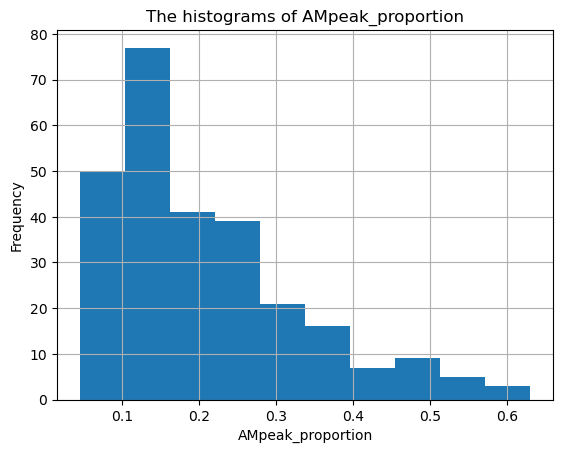

In [106]:
AMpeak1 = peak_counts.loc[:,"AMpeak_proportion"] #select the column of "AMpeak_proportion" and name it as "AMpeak1".
plt.xlabel("AMpeak_proportion")
plt.ylabel("Frequency")
plt.title("The histograms of AMpeak_proportion")
AMpeak1.hist(grid = True, bins=10) #use .hist() show the histograms of AMpeak_proportion and set bins = 10.

<AxesSubplot:title={'center':'The histograms of PMpeak_proportion'}, xlabel='PMpeak_proportion', ylabel='Frequency'>

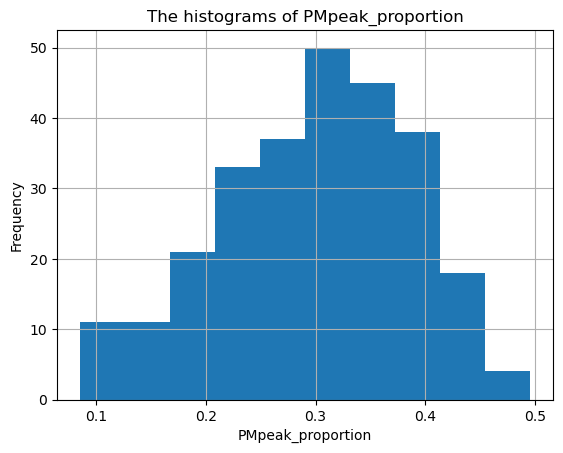

In [107]:
PMpeak1 =  peak_counts["PMpeak_proportion"] #select the column of "PMpeak_proportion" and name it as "PMpeak1".
plt.xlabel("PMpeak_proportion")
plt.ylabel("Frequency")
plt.title("The histograms of PMpeak_proportion")
PMpeak1.hist(grid = True, bins=10) #use .hist() show the histograms of PMpeak_proportion and set bins = 10.

Text(0.5, 0, 'Proportion')

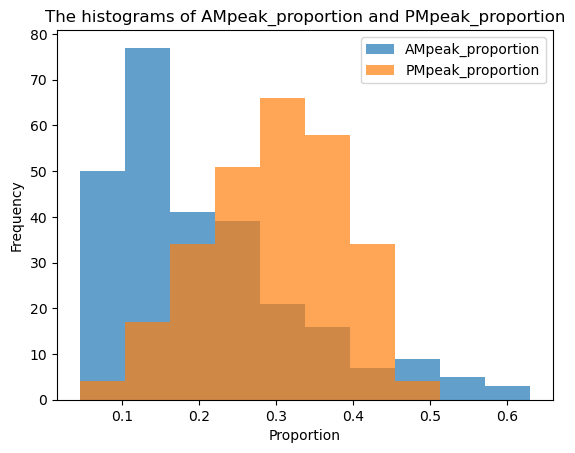

In [108]:
#select both columns of "AMpeak_proportion" and "PMpeak_proportion" and name it as "Peak".
Peak = peak_counts.loc[:,["AMpeak_proportion","PMpeak_proportion"]]

# use .plot.hist() to show the histograms of AMpeak_proportion and PMpeak_proportion and set bins = 10 and alpha = 0.7.
# alpha is to adjust the transparency of the chart to facilitate data comparison and display.
Peak.plot.hist(bins=10, alpha=0.7)
plt.title("The histograms of AMpeak_proportion and PMpeak_proportion")
plt.xlabel("Proportion")

### 2.2 Review and comment on what the results of step 1 show about travel patterns.

#### AMpeak_portion are mostly between 0.1 - 0.2, it shows most stations have small amount of exits at AMpeak, and the higher proportion in low frequency shows people in Ampeak are more likely go to the same stations, so proportion between 0.4 - 0.6 has a lower proportion.
##### 1. Statistics
##### Minimum: 0.045302 Maximum:0.630427 count:268.00 range[0.045302, 0.630427]
##### Mean: 0.207132
##### Standard deviation: 0.122161
##### Median: 0.169378
##### Quartiles:  0%: 0.045302 25%: 0.116129 50%: 0.169378 75%: 0.266443 100%: 0.630427
##### 2.Shapes
##### Positively skewed distribution.
####
#### PMpeak_portion are mostly between 0.3 - 0.4, shows there are more diversity when people exit at PMpeak, people live in different areas so the stream of exits are divided into different stations, so the proportions of PMpeak are more evenly than AMpeak.
##### 1. Statistics
##### Minimum: 0.0884630 Maximum:0.298750 count:268.00 range[0.0884630, 0.298750]
##### Mean: 0.298750
##### Standard deviation: 0.087724
##### Median: 0.307397
##### quartiles:  0%: 0.0884630 25%: 0.240947 50%: 0.307397 75%: 0.361596 100%: 0.298750
##### 2.Shapes
##### Negatively skewed distribution.

## Part 3: A Simple Classification of Stations

### The aim of this section is to classify stations into mainly 'work', mainly 'residential' and 'other' and complete a simple evaluation.

#### Use the result AMpeak_proportion minus PM_proportion to create a new column and name it as "Difference".

In [109]:
peak_counts = peak_counts.assign(Difference = peak_counts.AMpeak_proportion - peak_counts.PMpeak_proportion)
peak_counts

,AMpeak,PMpeak,Total,AMpeak_proportion,PMpeak_proportion,Difference
Station,,,,,,
Acton Town,1970,2628,9362,0.210425,0.280709,-0.070284
Aldgate,7408,2992,16136,0.459098,0.185424,0.273674
Aldgate East,7618,3803,21206,0.359238,0.179336,0.179902
Alperton,856,1847,5118,0.167253,0.360883,-0.193630
Amersham,424,1465,3905,0.108579,0.375160,-0.266581
...,...,...,...,...,...,...
Wimbledon Park,497,1114,3296,0.150789,0.337985,-0.187197
Wood Green,2165,6494,18989,0.114013,0.341987,-0.227974
Wood Lane,1798,1766,6610,0.272012,0.267171,0.004841


In [110]:
peak_counts.Difference.describe() #use .describe() to analyse the data in the column of "difference".

count    268.000000
mean      -0.091618
std        0.203932
min       -0.440373
25%       -0.242542
50%       -0.139068
75%        0.014010
max        0.539649
Name: Difference, dtype: float64

Text(0.5, 1.0, 'The historgram of Difference')

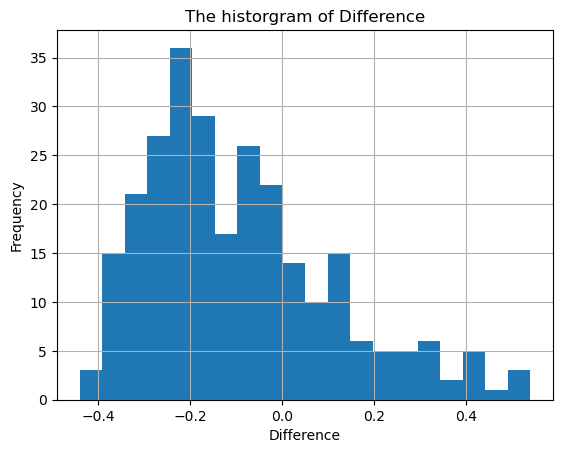

In [111]:
Ratio = peak_counts.loc[:,"Difference"]
Ratio.hist(bins=20) # create a historgram of Difference
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.title('The historgram of Difference')

Text(0.5, 1.0, 'The boxplot of Difference')

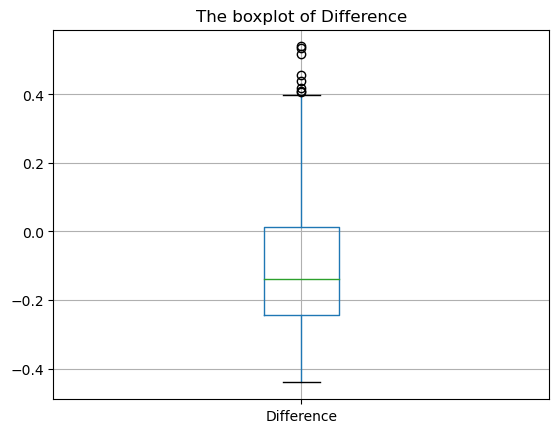

In [112]:
peak_counts.boxplot(column=["Difference"]) # create a boxplot of Difference
plt.title('The boxplot of Difference')

#### From above we can know that the mean of the Difference is -0.09 and standard  deviation is 0.20; From the histogram and boxplot of difference we can see the whole difference are Positively skewed distribution and more numbers are tend to be negative values. 
#### The thresholds between [0, 0.1] should be a reasonable section for distinguish Work area, consider the difference has lower frequency I choose a smaller thresholds (0.05) for Work area. 
#### The thresholds between [-0.1, 0] should be a reasonable section for distinguish Residential area, consider the difference has larger frequency I choose a bigger thresholds (-0.08) for Residential area. 
#### Standards or thresholds:
##### 1. (difference > 0.05) as Work area; 
##### 2. (difference < - 0.08) as Residential area;
##### 3. (-0.05 <= difference <= 0.08) as other area.

In [113]:
# Define a function to classify different areas with the standard.
def classification(row):
    if (row.Difference > 0.05) : return 'Work'
    if (row.Difference < -0.08) : return 'Residential'
    return 'Other'

In [114]:
# Assign a column applying the function defined above, and name it as "Area".
stations = peak_counts.assign(Area = peak_counts.apply(classification, axis=1))
print('Here are the classification of all stations')
stations

Here are the classification of all stations


,AMpeak,PMpeak,Total,AMpeak_proportion,PMpeak_proportion,Difference,Area
Station,,,,,,,
Acton Town,1970,2628,9362,0.210425,0.280709,-0.070284,Other
Aldgate,7408,2992,16136,0.459098,0.185424,0.273674,Work
Aldgate East,7618,3803,21206,0.359238,0.179336,0.179902,Work
Alperton,856,1847,5118,0.167253,0.360883,-0.193630,Residential
Amersham,424,1465,3905,0.108579,0.375160,-0.266581,Residential
...,...,...,...,...,...,...,...
Wimbledon Park,497,1114,3296,0.150789,0.337985,-0.187197,Residential
Wood Green,2165,6494,18989,0.114013,0.341987,-0.227974,Residential
Wood Lane,1798,1766,6610,0.272012,0.267171,0.004841,Other


### Report your classification of the following station (all on the Northern Line).

In [115]:
#create the list of Northern Line.
north_line = ['Archway', 'Balham', 'Embankment', 'Goodge Street', 'Highgate', 'High Barnet', 'Leicester Square','Morden', 'South Wimbledon', 'Tottenham Court Road', 'Warren Street']

In [116]:
# Use .index() and .isin() to filter stations in Northern line in the stations table.
Northern_Line = stations[(stations.index.isin(north_line))]
print("Here are the classification of Northern Line")
Northern_Line

Here are the classification of Northern Line


,AMpeak,PMpeak,Total,AMpeak_proportion,PMpeak_proportion,Difference,Area
Station,,,,,,,
Archway,2190,4106,13935,0.157158,0.294654,-0.137496,Residential
Balham,2637,7635,22128,0.119170,0.345038,-0.225868,Residential
Embankment,10692,8829,33781,0.316509,0.261360,0.055149,Work
Goodge Street,5374,1949,12817,0.419287,0.152064,0.267223,Work
High Barnet,987,2362,6843,0.144235,0.345170,-0.200935,Residential
Highgate,893,3170,8921,0.100101,0.355341,-0.255240,Residential
Leicester Square,8952,12915,47772,0.187390,0.270347,-0.082957,Residential
Morden,1550,5955,15680,0.098852,0.379783,-0.280931,Residential
South Wimbledon,1335,2198,7197,0.185494,0.305405,-0.119911,Residential


### Just pick "Archway" and "Balham" to take a look from the tube map, it shows both in zone 3 and classified as 'Residential' seems to be correct; So the whole classification should works.

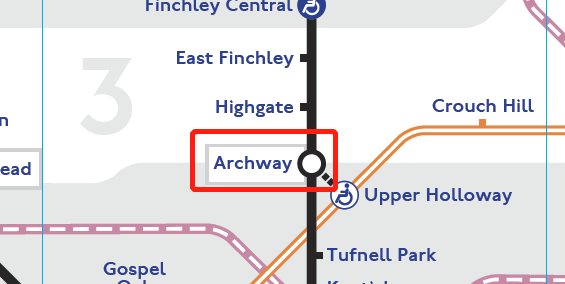
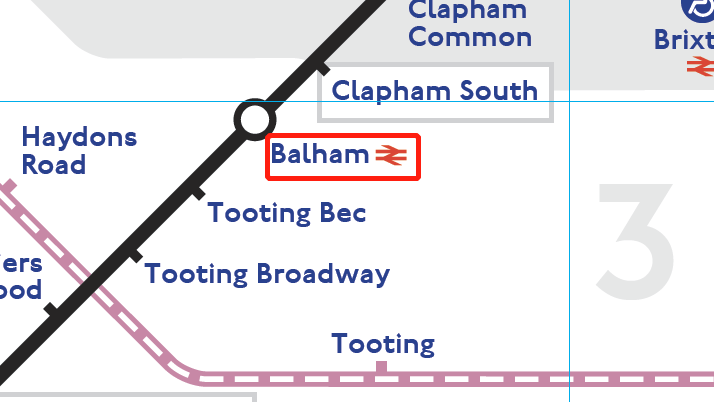